In [72]:
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

Files already downloaded and verified
Files already downloaded and verified


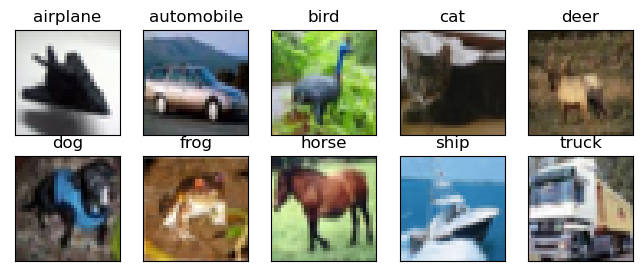

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [73]:
from torchvision import datasets

# Trainings- und Validierungsdaten runterladen:
cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

# Klassennamen:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10

# Subplot pro Klasse:
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i) # einzelnes Bild pro Klasse raussuchen und auf Klassennamen prüfen
    plt.imshow(img)
plt.show()


from torchvision import transforms
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.ToTensor())

img, _ = cifar10[99]

imgs = torch.stack([img for img, _ in cifar10], dim=3)

imgs.view(3, -1).mean(dim=1)
imgs.view(3, -1).std(dim=1)
# Normalisierungsfunktion: Werte der Standardab. und Mttelwertberechnung
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

In [74]:
# für Trainingsdatensatz
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [75]:
# für Validierungsdatensatz
cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [76]:
# Alle Flugzeug- und Vögelbilder raussuchen
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

# NLLLoss Funktion:

# Klasse DataLoader erzeugt "miniBatches"
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

# deutlich schneller (weniger Bilder)
train_NLLLoss = np.zeros(n_epochs)
train_losses_NLL = []  # Liste für Trainingsverluste
val_losses_NLL = []  # Liste für Validierungsverluste

# Training des Trainingsdatensatzes:
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_train_NLL = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss_train_NLL.backward()
        optimizer.step()

    print("Epoche: %d, Loss: %f" % (epoch, float(loss_train_NLL)))
    train_NLLLoss[epoch-1] = loss_train_NLL.detach().numpy()    # Trainingsverlust

# Training des Validierungsdatensatzes:
val_NLLLoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_val_NLL = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss_val_NLL.backward()
        optimizer.step()

    val_NLLLoss[epoch-1] = loss_val_NLL.detach().numpy()    # Validierungsverlust

Epoche: 0, Loss: 0.552094
Epoche: 1, Loss: 0.484176
Epoche: 2, Loss: 0.557825
Epoche: 3, Loss: 0.554888
Epoche: 4, Loss: 0.570663
Epoche: 5, Loss: 0.350973
Epoche: 6, Loss: 0.591266
Epoche: 7, Loss: 0.548075
Epoche: 8, Loss: 0.190939
Epoche: 9, Loss: 0.437478
Epoche: 10, Loss: 0.350288
Epoche: 11, Loss: 0.243390
Epoche: 12, Loss: 0.190494
Epoche: 13, Loss: 0.358921
Epoche: 14, Loss: 0.516138
Epoche: 15, Loss: 0.274657
Epoche: 16, Loss: 0.386394
Epoche: 17, Loss: 0.116322
Epoche: 18, Loss: 0.338291
Epoche: 19, Loss: 0.239839
Epoche: 20, Loss: 0.518006
Epoche: 21, Loss: 0.167759
Epoche: 22, Loss: 0.298613
Epoche: 23, Loss: 0.279513
Epoche: 24, Loss: 0.182074
Epoche: 25, Loss: 0.294607
Epoche: 26, Loss: 0.412752
Epoche: 27, Loss: 0.219163
Epoche: 28, Loss: 0.151529
Epoche: 29, Loss: 0.112381
Epoche: 30, Loss: 0.297842
Epoche: 31, Loss: 0.374713
Epoche: 32, Loss: 0.309709
Epoche: 33, Loss: 0.250677
Epoche: 34, Loss: 0.306587
Epoche: 35, Loss: 0.145437
Epoche: 36, Loss: 0.209056
Epoche: 37,

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim

# MSELoss Funktion:

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100
# deutlich schneller (weniger Bilder)
train_MSELoss = np.zeros(n_epochs)
train_losses_MSE = []  # Liste für Trainingsverluste
val_losses_MSE = []  # Liste für Validierungsverluste

# Training des Trainingsdatensatzes:
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_train_MSE = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss_train_MSE.backward()
        optimizer.step() 
        
    print("Epoche: %d, Loss: %f" % (epoch, float(loss_train_MSE)))
    train_MSELoss[epoch-1] =  loss_train_MSE.detach().numpy()   #Trainingsverlust


# Training des Validierungsdatensatzes:
val_MSELoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in val_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_val_MSE = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss_val_MSE.backward()
        optimizer.step()
        
    val_MSELoss[epoch-1] =  loss_val_MSE.detach().numpy()   #Validierungsverlust

Epoche: 0, Loss: 0.562500
Epoche: 1, Loss: 0.562500
Epoche: 2, Loss: 0.500000
Epoche: 3, Loss: 0.562500
Epoche: 4, Loss: 0.687500
Epoche: 5, Loss: 0.437500
Epoche: 6, Loss: 0.500000
Epoche: 7, Loss: 0.500000
Epoche: 8, Loss: 0.437500
Epoche: 9, Loss: 0.375000
Epoche: 10, Loss: 0.437500
Epoche: 11, Loss: 0.687500
Epoche: 12, Loss: 0.375000
Epoche: 13, Loss: 0.687500
Epoche: 14, Loss: 0.562500
Epoche: 15, Loss: 0.375000
Epoche: 16, Loss: 0.687500
Epoche: 17, Loss: 0.562500
Epoche: 18, Loss: 0.375000
Epoche: 19, Loss: 0.500000
Epoche: 20, Loss: 0.250000
Epoche: 21, Loss: 0.437500
Epoche: 22, Loss: 0.250000
Epoche: 23, Loss: 0.562500
Epoche: 24, Loss: 0.500000
Epoche: 25, Loss: 0.500000
Epoche: 26, Loss: 0.312500
Epoche: 27, Loss: 0.562500
Epoche: 28, Loss: 0.375000
Epoche: 29, Loss: 0.562500
Epoche: 30, Loss: 0.437500
Epoche: 31, Loss: 0.562500
Epoche: 32, Loss: 0.437500
Epoche: 33, Loss: 0.375000
Epoche: 34, Loss: 0.500000
Epoche: 35, Loss: 0.500000
Epoche: 36, Loss: 0.625000
Epoche: 37,

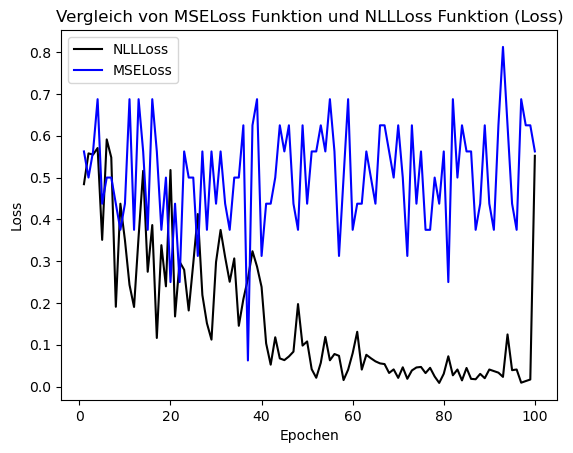

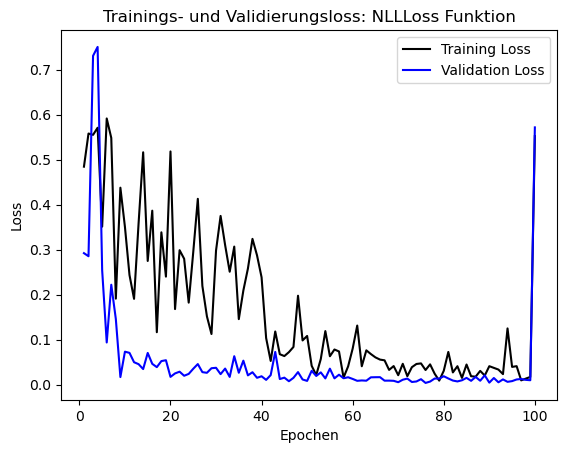

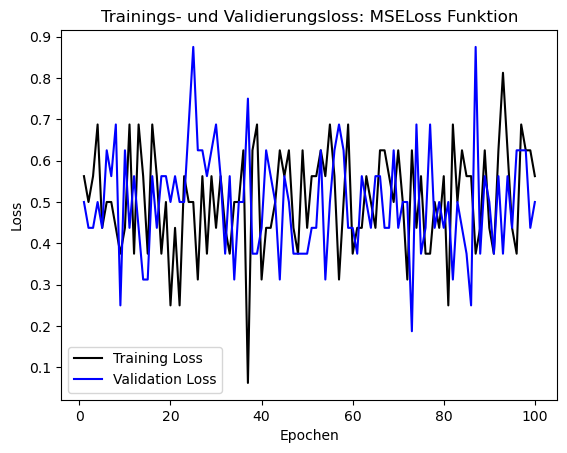

In [79]:
# Vergleich MSELoss Funktion und NLLLoss Funktion
epochs = range(1, len(train_NLLLoss) + 1)
fig = plt.figure(dpi=100)
plt.plot(epochs, train_NLLLoss, 'k', label='NLLLoss')
plt.plot(epochs, train_MSELoss, 'b', label='MSELoss')  
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title('Vergleich von MSELoss Funktion und NLLLoss Funktion (Loss)')
plt.legend(loc="best")
plt.show()

#################################################################################
# Trainings- und Validierungsloss: NLLLoss Funktion

epochs_train = range(1, len(train_NLLLoss) + 1)
epochs_val = range(1, len(train_NLLLoss) + 1)
fig = plt.figure(dpi=100)
plt.plot(epochs_train, train_NLLLoss, 'k', label='Training Loss')
plt.plot(epochs_val, val_NLLLoss, 'b', label='Validation Loss')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title('Trainings- und Validierungsloss: NLLLoss Funktion')
plt.legend(loc="best")
plt.show()

##############################################################################
# Trainings- und Validierungsloss: MSELoss Funktion

epochs_train = range(1, len(train_MSELoss) + 1) 
epochs_val = range(1, len(val_MSELoss) + 1)
fig = plt.figure(dpi=100)
plt.plot(epochs_train, train_MSELoss, 'k', label='Training Loss')
plt.plot(epochs_val, val_MSELoss, 'b', label='Validation Loss')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title('Trainings- und Validierungsloss: MSELoss Funktion')
plt.legend(loc="best")
plt.show()

Der "Loss" während des Trainings, unter Verwendung der NLLLoss-Funktion, fällt ab und ist niedriger als der "Loss" unter Verwendund der MSELoss-Funktion. Der Trainings- und Validierungsloss stagniert unter Verwendung der MSELoss-Funktion im Laufe des Trainings und es kommt zum "Overfitting". 
Im Folgenden wird das Netzwerk verkleinert, um das "Overfitting" zu verhindern. Dafür wird die Anzahl an "hidden neurons" von 3072 auf 64 verringert. Zudem wird eine Regulierungstechnik "Dropout" hinzugefügt, um das Overfitting zu reduzieren, dadurch wird die Komplexität des Modells eingeschränkt.

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

# MSELoss Funktion mit verkleinertem Netzwerk:

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 64),  # Verringerung der Anzahl an "hidden neurons" auf 64
    nn.Tanh(),
    nn.Dropout(0.5),  # Dropout mit einer Wahrscheinlichkeit von 0.5
    nn.Linear(64, 1),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

n_epochs = 100
# deutlich schneller (weniger Bilder)
train_MSELoss = np.zeros(n_epochs)
train_losses_MSE = []  # Liste für Trainingsverluste
val_losses_MSE = []  # Liste für Validierungsverluste

# Training des Trainingsdatensatzes:
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_train_MSE = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss_train_MSE.backward()
        optimizer.step() 
        
    print("Epoche: %d, Loss: %f" % (epoch, float(loss_train_MSE)))
    train_MSELoss[epoch-1] =  loss_train_MSE.detach().numpy()   #Trainingsverlust


# Training des Validierungsdatensatzes:
val_MSELoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in val_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_val_MSE = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss_val_MSE.backward()
        optimizer.step()
    
    val_MSELoss[epoch-1] =  loss_val_MSE.detach().numpy()   #Validierungsverlust

Epoche: 0, Loss: 0.437500
Epoche: 1, Loss: 0.500000
Epoche: 2, Loss: 0.562500
Epoche: 3, Loss: 0.500000
Epoche: 4, Loss: 0.562500
Epoche: 5, Loss: 0.312500
Epoche: 6, Loss: 0.437500
Epoche: 7, Loss: 0.437500
Epoche: 8, Loss: 0.500000
Epoche: 9, Loss: 0.687500
Epoche: 10, Loss: 0.562500
Epoche: 11, Loss: 0.437500
Epoche: 12, Loss: 0.375000
Epoche: 13, Loss: 0.687500
Epoche: 14, Loss: 0.437500
Epoche: 15, Loss: 0.500000
Epoche: 16, Loss: 0.750000
Epoche: 17, Loss: 0.312500
Epoche: 18, Loss: 0.312500
Epoche: 19, Loss: 0.437500
Epoche: 20, Loss: 0.375000
Epoche: 21, Loss: 0.437500
Epoche: 22, Loss: 0.562500
Epoche: 23, Loss: 0.562500
Epoche: 24, Loss: 0.500000
Epoche: 25, Loss: 0.312500
Epoche: 26, Loss: 0.375000
Epoche: 27, Loss: 0.437500
Epoche: 28, Loss: 0.562500
Epoche: 29, Loss: 0.437500
Epoche: 30, Loss: 0.500000
Epoche: 31, Loss: 0.437500
Epoche: 32, Loss: 0.812500
Epoche: 33, Loss: 0.625000
Epoche: 34, Loss: 0.437500
Epoche: 35, Loss: 0.625000
Epoche: 36, Loss: 0.625000
Epoche: 37,

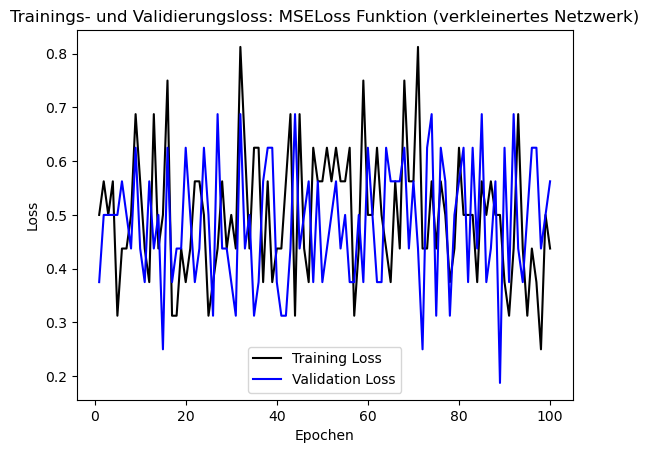

In [81]:
##############################################################################
# Trainings- und Validierungsloss: MSELoss Funktion (verkleinertes Netzwerk)

epochs_train = range(1, len(train_MSELoss) + 1) 
epochs_val = range(1, len(val_MSELoss) + 1)
fig = plt.figure(dpi=100)
plt.plot(epochs_train, train_MSELoss, 'k', label='Training Loss')
plt.plot(epochs_val, val_MSELoss, 'b', label='Validation Loss')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title('Trainings- und Validierungsloss: MSELoss Funktion (verkleinertes Netzwerk)')
plt.legend(loc="best")
plt.show()

Eine deutliche Verbesserung mit einem kleineren Netzwerk ist nicht zu erkennen. Teilweise ist der "Loss" höher, als vor der Verkleinerung des Netzwerkes. Gründe dafür könnten sein, dass die MSELoss-Funktion sensitiv gegenüber Ausreißern ist, da die Funktion den Schwerpunkt auf die Quadratwerte der Fehler legt und dadurch können Ausreißer in den Daten das Modell stark beeinflussen. Zudem berücksichtigt die MSELoss-Funktion keine Klassenungleichgewichte. Wenn die Daten ungleichmäßig auf verschiedene Klassen verteilt sind, kann die MSE-Loss-Funktion die Leistung des Modells beeinflussen.